# The problem

The deflection plates in an oscilloscope are 10 cm by 2 cm with a gap distance of 1 mm. A 100 volt potential difference is suddenly applied to the initially uncharged plates through a 975 ohm resistor in series with the deflection plates. How long does it take for the potential difference between the deflection plates to reach 65 volts?

# Can we simulate the answer?

This problem is describing an "RC" circuit - a circuit with a capacitor and a resistor in series.  What tips me off that this is a capacitor problem is the word "plates".  Then they say a resistor is in series with the plates, which gives me the information that this is an "RC" circuit.

I might be able to simulate this in the PHeT AC Circuit simulator!  They tell me that a voltage of 100 V is applied across the capacitor, they give me the information I need to calculate the capacitance, and they tell me the resistance is 975 Ohms.

So let's calculate the capacitance and then see if we can build the circuit in PHeT.

In [5]:
from scipy import constants

In [6]:
length = 10E-2
width = 2E-2
gap = 1E-3

# See HW5 Q5 for an explanation of this formula
C = constants.epsilon_0*length*width/gap

In [7]:
print (C)

1.7708375625600004e-11


# We can't simulate the answer in PHeT :(

Unfortunately the smallest capacitance PHeT gives us 0.05 F, and the highest resistance is 120 Ohms.  We can make a voltage of 100 V, though.

So we can't build this exact circuit.  But we can build a similar circuit and see how it behaves.  Below is a circuit with a capacitance of 0.05 Farads, a resistance of 10 Ohms, and a voltage of 100 V.

When I close the switch, the voltage across the capacitor slowly builds up to 100 V.  It takes about half a second to get to a voltage

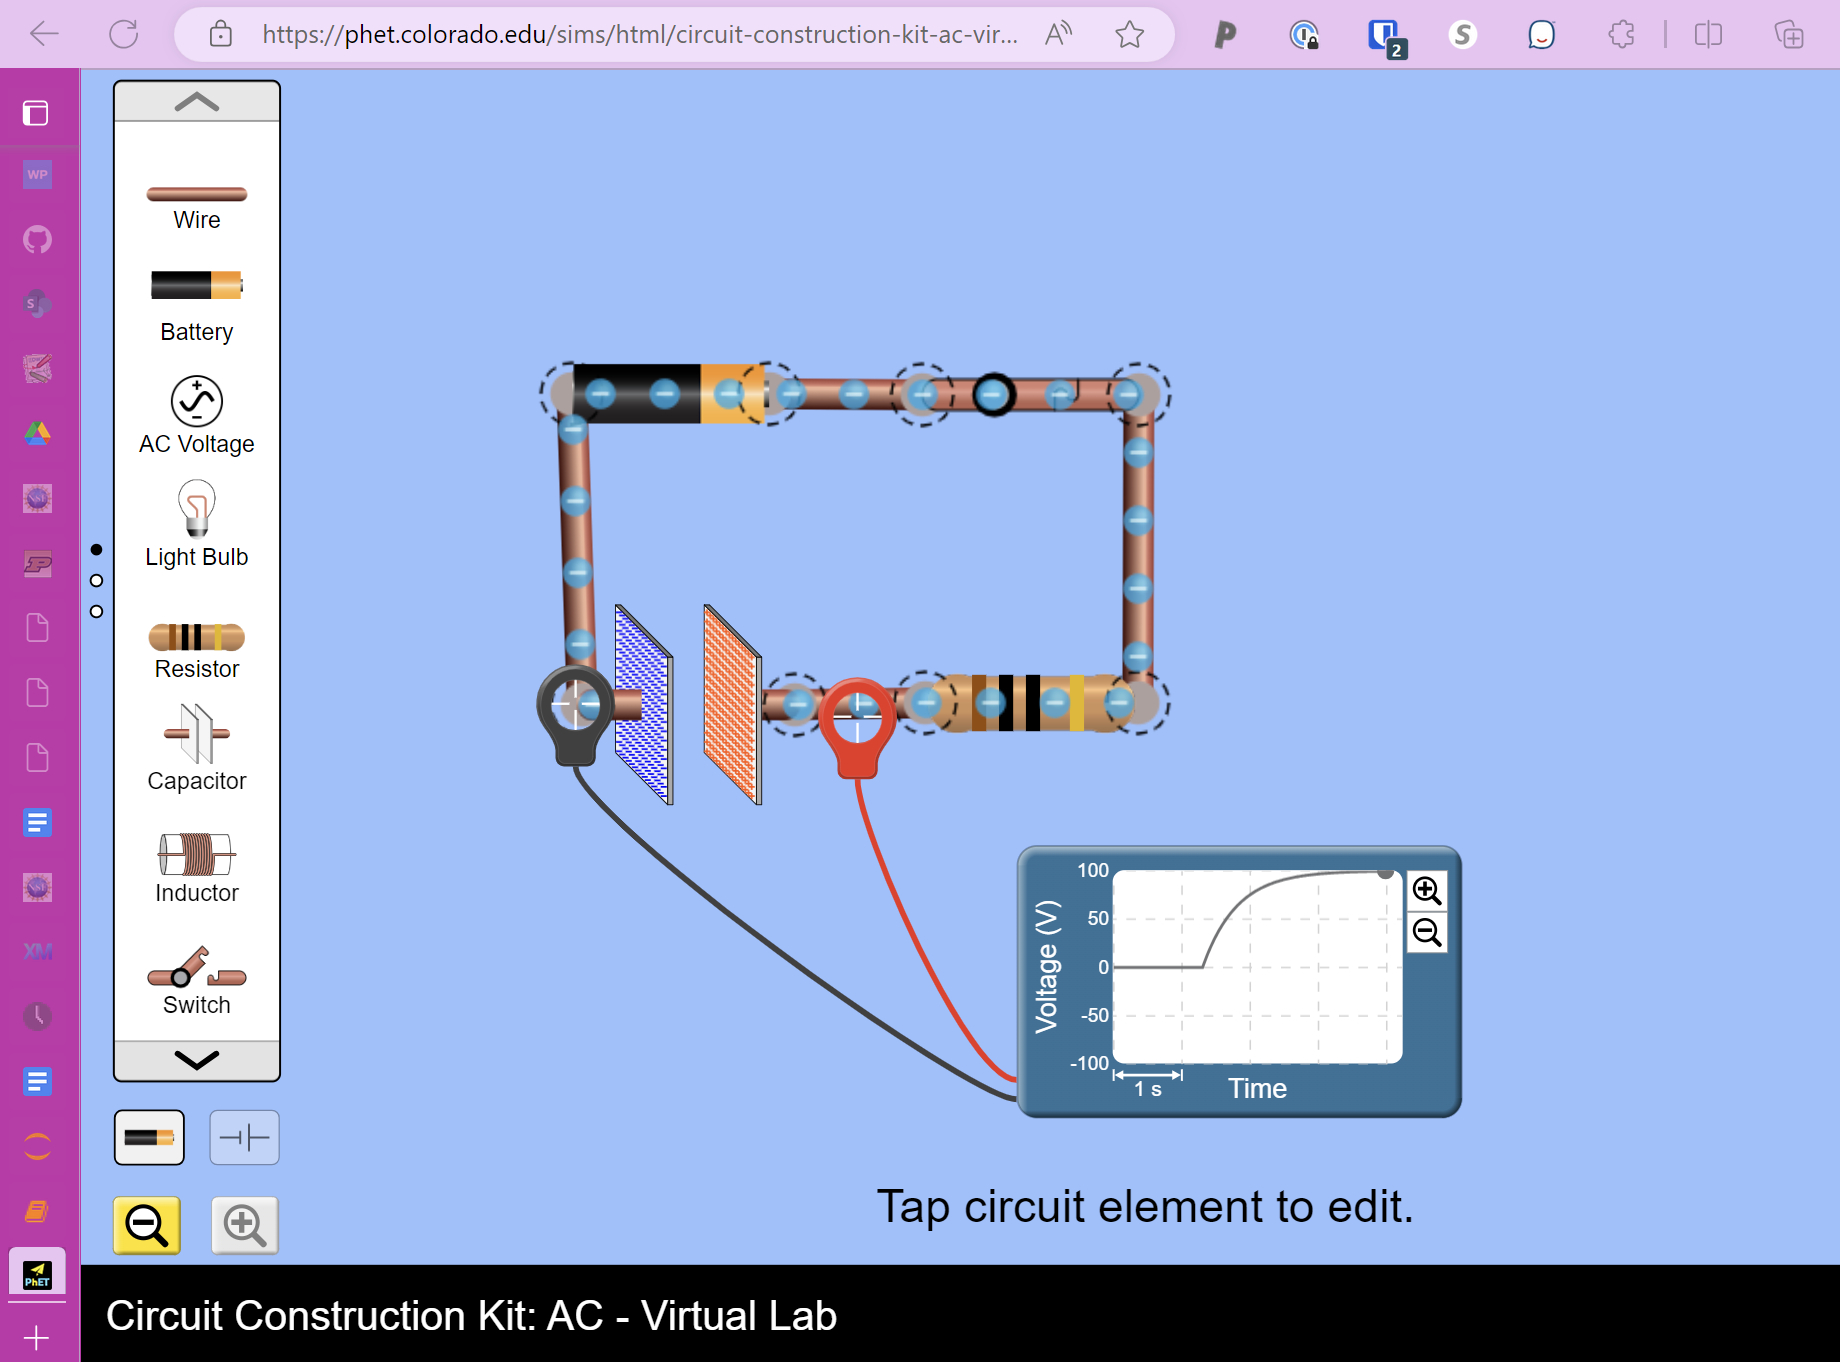

# The equation(s) needed for this problem

If you google "RC circuit charging" you'll find many resources!  There is a very complete discussion at https://en.universaldenker.org/lessons/1213#voltage-across-the-capacitor-during-charging.

Notice that on this website they use "U" for the electric potential (voltage) rather than "V".

Equation 13 on this page says that the voltage across a charging capacitor is

$V_{capacitor}(t) = V_{battery}(1-e^{-t/RC})$

The above website derives this equation as well!

In our case we want to find the time at which $V_{capacitor}$ is 65 V.  In other words, we know $V_{capacitor}$, $V_{battery}$, $R$, and $C$ and we want to solve for $t$.

Since $t$ is trapped in an exponential, we'll need to take the natural logarithm.  So the first step is getting the term $e^{-t/RC}$ all by itself.

$V_{capacitor} = V_{battery}- V_{battery}e^{-t/RC}$

$V_{battery}e^{-t/RC} =  V_{battery}- V_{capacitor}$

$e^{-t/RC} = \frac{V_{battery}- V_{capacitor}}{V_{battery}} = 1 - \frac{V_{capacitor}}{V_{battery}}$

And now we can take the natural logarithm of both sides:

$-\frac{t}{RC} = \ln (1 - \frac{V_{capacitor}}{V_{battery}})$

And then solve for $t$

$t = -RC\ln (1 - \frac{V_{capacitor}}{V_{battery}})$



# Checking the PHeT simulation

Let's check that this equation for time gives us about the same answer as we saw in the PHeT simulation.

In [8]:
import numpy as np

In [9]:
# These values are from my above PHeT simulation
# They are NOT the numbers given in the problem!
R = 10
C = 0.05
V_battery = 100
V_capacitor = 65

In [10]:
t = -R*C*np.log(1-V_capacitor/V_battery)

In [11]:
print (t)

0.5249110622493389


# Doing the homework problem

Based on the work above, can you calculate how long it takes for the capacitor in the problem to reach 65 V?